# Assignment 2 
## Part I: Advanced Networks Structure

## The philosopher graph
### Initial work (getting the graph)

In [1]:
# Import relevant libraries and initialize network
import networkx as nx
import cPickle as pickle
%matplotlib inline

In [2]:
# Reading the philosophers into directed graph 
data=nx.read_gpickle('phil_test.pkl')
phil_graph = nx.DiGraph(data) 

In [25]:
# Creating a directed graph from the directed version
phil_graph_undirected = phil_graph.to_undirected()

# WE NEED TO WORK ON THE GIAN COMPONENT ONLY!
GCC=sorted(nx.connected_component_subgraphs(phil_graph_undirected), key = len, reverse=True)
phil_GCC=GCC[0]

### Find the 5 most central philosophers according to betweenness centrality. 

Documentation [here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)

In [26]:
import operator
# Finding betweenness centrality for all nodes
betweenDict = nx.betweenness_centrality(phil_GCC)

# Picking out the 5 highest values of betweenness centrality from the dictionary
sorted(betweenDict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5]

[('Aristotle', 0.12227895188672465),
 ('Immanuel Kant', 0.12010073380829026),
 ('Bertrand Russell', 0.1030278958087102),
 ('Plato', 0.07897461735423103),
 ('David Hume', 0.06817860457060562)]

#### What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?
Short description of betweenness centrality:
* A centrality measure of a vertex within a graph. *Vertices that occur on many shortest paths between other vertices have higher betweenness than those that do not*.
* *How many pairs of individuals would you have to go through in orer to reach one another in the minimum number of hops*

Since centrality is all about which nodes that are the most "connecting" nodes (the ones that occur in the most number of shortest paths), the philosophers with a high betweenness centrality are the ones that can be seen as the most important ones. In this case we believe they will be some of the oldest of the philosophers. 

### Find the 5 most central philosophers according to eigenvector centrality. 
#### Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). 


In [27]:
# Finding the eigenvector centrality
eigenDict = nx.eigenvector_centrality(phil_GCC)

# Picking the 5 highest values of eigenvector centrality for the dict
sorted(eigenDict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5]

[('Immanuel Kant', 0.2635982491051751),
 ('Aristotle', 0.23076966455831124),
 ('Plato', 0.1890118359913392),
 ('Bertrand Russell', 0.1880333733012835),
 ('Georg Wilhelm Friedrich Hegel', 0.1837988732780909)]

#### How is eigenvector centrality different from degree centrality? 
*The Network Science book is used to answer this question together with the following [Wiki-page](https://en.wikipedia.org/wiki/Centrality)*

*Degree centrality* looks at how connected you are i.e the number of links incident upon a node. 

*Eigenvector centrality* accounts for how important you are to the entire network -- this is done by creating a score where you get a higher score from being connected to nodes with a higher degree centrality.

Thus calculating the eigenvector centrality of a node is done using the degree centrality of the nodes connected to the one at hand.


#### Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?
Yes, Aristotle was mentioned in all the different core areas of the philosophers, Kant and Plato are both huge within their fields. Common for all the mentioned philosophers are, that they are a huge inspiration to all subsequent philosophers in their fields.   


### Is the undirected version of the graph assortative with respect do degree? 
*(e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?).*

In [28]:
# Find the assortativity coefficient
print "Assortativity coefficient:", nx.degree_assortativity_coefficient(phil_GCC)


Assortativity coefficient: -0.0736382886959


#### Interpretation of result
Since the coefficient is negative, the graph is not assortative with respect to degree.

________________________________________________________________________________________
## Community detection

### Use the Python Louvain-algorithm implementation to find communities in the full philosopher network. 
Link to documentation [here](http://perso.crans.org/aynaud/communities/).

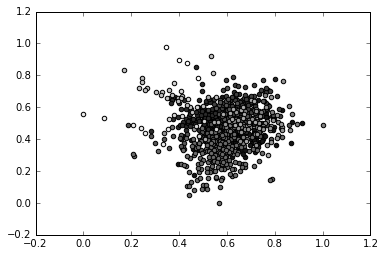

In [35]:
import community
import networkx as nx
import matplotlib.pyplot as plt

#first compute the best partition
partition = community.best_partition(phil_GCC)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(phil_GCC)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(phil_GCC, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


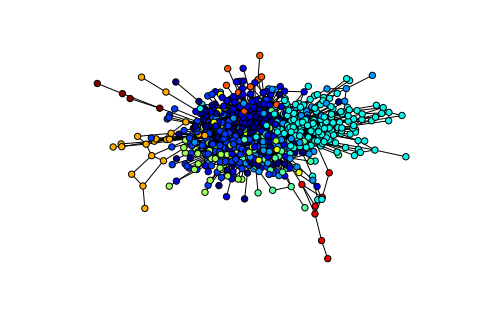

In [40]:
# drawing the graph partitioned in communities (by color)
values = [partition.get(node) for node in phil_GCC.nodes()]
nx.draw_spring(phil_GCC, cmap = plt.get_cmap('jet'), node_color = values, node_size=40, with_labels=False)

#### Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the branches as communities? What does this comparison reveal about the branches?

In [37]:
mod = community.modularity(partition,phil_GCC)
print("modularity:", mod)

('modularity:', 0.4541078612996927)


It is easy to see from the plot, that we are working with nested communities since the philosophers belong to several groups in the network.

#### You can also try the Infomap algorithm instead if you're curious. Go to this page and search for 'python'. It's harder to install, but a better community detection algorithm.

In [10]:
## TRY THIS IF TIME

### Compare the communities found by your algorithm with the branches of philosophy (see Lecture 5 for details on the branches) by creating a matrix D with dimension (B $\cdot$ C), 
*B is the number of branches and C is the number of communities. We set entry $D(i,j)$ to be the number of nodes that branch i has in common with community j.* 

In [47]:
# Number of communities
size

12.0

In [46]:
# community values
set(partition.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [48]:
partition.keys()

['Christian Wolff (philosopher)',
 'Eli Siegel',
 'Marsilius of Inghen',
 'Heinrich Gustav Hotho',
 'Isaiah Berlin',
 'Martin Heidegger',
 'Todd May',
 'Hans Pfitzner',
 'Susanna Schellenberg',
 'Enrique Dussel',
 'Joxe Azurmendi',
 'Blaise Pascal',
 'Duns Scotus',
 'Geoffrey Sayre-McCord',
 'Moses',
 'Raphael M. Robinson',
 'Newton da Costa',
 'Lysander Spooner',
 'Houston Stewart Chamberlain',
 'Guy Aldred',
 'Roderick Long',
 'Plato',
 'John Shelby Spong',
 'Nosson Tzvi Finkel (Slabodka)',
 'Gerald Sacks',
 'J. M. E. McTaggart',
 'Rosalind Hursthouse',
 'Holly Martin Smith',
 'Young Hegelians',
 'David D. Friedman',
 'Chanakya',
 'Kazimierz Twardowski',
 'Michael A. Smith',
 'Socrates',
 'Dign\xc4\x81ga',
 'David K. Lewis',
 'Nicolai A. Vasiliev',
 'Roberto Mangabeira Unger',
 'Max Horkheimer',
 'Jonathan Wolff (philosopher)',
 'Roger Scruton',
 'Johann Albert Fabricius',
 'Mencius',
 'George Berkeley',
 'Hilary Kornblith',
 'Joseph Diaz Gergonne',
 'Friedrich Hayek',
 'John Duns Sc

In [ ]:
# The confusion matrix
df_cm = pd.DataFrame(array, index = [i for i in "'ABCDEFGHIJK'"],
                  columns = [i for i in "'ABCDEFGHIJK'"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of philosophy.

We have 6 different branches of philosophy and 12 communities recognized by the Python Louvain-algorithm. This gives ud a 6 times 12 matrix. The lower the value of the the entries $(i,j)$ in D gets, the better the community detection. This is because 
Since Aristotle is in all of the communities,

In [41]:
partition

{'A. J. Ayer': 4,
 'Abraham Fraenkel': 4,
 'Abraham Joshua Heschel': 3,
 'Abraham Robinson': 0,
 'Abraham ibn Daud': 1,
 'Abul Kalam Azad': 5,
 'Adam M\xc3\xbcller': 2,
 'Adam Smith': 0,
 'Adolf Lindenbaum': 4,
 'Adrian Johnston (philosopher)': 2,
 'Alain Badiou': 2,
 'Alan Carter (philosopher)': 2,
 'Alan Gewirth': 2,
 'Alan Ross Anderson': 9,
 'Alan Ryan': 0,
 'Alan Turing': 4,
 'Alasdair MacIntyre': 1,
 'Alasdair Urquhart': 9,
 'Albert Camus': 2,
 'Albert Schweitzer': 0,
 'Albert of Saxony (philosopher)': 1,
 'Aldo Leopold': 3,
 'Alexander Bain': 0,
 'Alexander Campbell Fraser': 0,
 'Alexander Gottlieb Baumgarten': 0,
 'Alexander Zinoviev': 2,
 'Alexis de Tocqueville': 5,
 'Alfred North Whitehead': 4,
 'Alfred Rosenberg': 1,
 'Alfred Tarski': 4,
 'Algernon Charles Swinburne': 7,
 'Ali Shariati': 2,
 'Alice Crary': 3,
 'Allan Gibbard': 3,
 'Alonzo Church': 4,
 'Alvin Goldman': 3,
 'Alvin Plantinga': 3,
 'Amartya Sen': 0,
 'Ambrose': 1,
 'Anaximander': 1,
 'Andrei Marga': 2,
 'Androni

In [42]:
size

12.0

In [43]:
partition.values()

[0,
 1,
 1,
 2,
 3,
 2,
 2,
 1,
 4,
 2,
 0,
 5,
 1,
 0,
 1,
 4,
 4,
 6,
 7,
 2,
 3,
 1,
 1,
 1,
 4,
 3,
 1,
 3,
 2,
 6,
 8,
 4,
 0,
 1,
 5,
 4,
 7,
 2,
 2,
 3,
 2,
 1,
 8,
 0,
 4,
 4,
 6,
 1,
 4,
 1,
 4,
 3,
 6,
 4,
 3,
 8,
 2,
 2,
 0,
 4,
 0,
 1,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 2,
 1,
 2,
 9,
 6,
 1,
 4,
 2,
 3,
 1,
 4,
 5,
 3,
 2,
 0,
 7,
 1,
 4,
 0,
 1,
 3,
 6,
 2,
 0,
 4,
 4,
 2,
 4,
 4,
 0,
 4,
 0,
 7,
 2,
 4,
 1,
 0,
 0,
 0,
 2,
 1,
 8,
 5,
 4,
 0,
 6,
 1,
 1,
 3,
 3,
 1,
 4,
 0,
 4,
 4,
 6,
 1,
 1,
 5,
 4,
 2,
 0,
 6,
 4,
 1,
 2,
 2,
 4,
 0,
 3,
 4,
 4,
 1,
 0,
 0,
 0,
 9,
 3,
 5,
 2,
 4,
 5,
 4,
 4,
 3,
 0,
 4,
 0,
 4,
 7,
 2,
 2,
 1,
 1,
 4,
 4,
 8,
 0,
 0,
 1,
 5,
 4,
 1,
 5,
 2,
 5,
 10,
 3,
 4,
 0,
 1,
 4,
 2,
 4,
 2,
 9,
 3,
 4,
 0,
 4,
 1,
 4,
 2,
 3,
 2,
 1,
 3,
 2,
 4,
 6,
 9,
 1,
 2,
 8,
 0,
 8,
 4,
 2,
 4,
 2,
 5,
 0,
 1,
 1,
 4,
 1,
 1,
 4,
 3,
 3,
 8,
 1,
 4,
 2,
 10,
 3,
 4,
 4,
 4,
 8,
 4,
 2,
 1,
 4,
 4,
 1,
 6,
 10,
 4,
 2,
 3,
 2,
 2,
 0,
 1,
 0,
 3,
 